# Compressing Data via Dimensionality Reduction

An alternative approach to **feature selection** for dimensionality reduction is **feature extraction.**

The **three fundamental technique** that can help summarize the infromation content of a dataset by transforming it onto a new feature subspace of lower dimensionality than original one are PCA, LDA, KPCA.

**Data compression is an important topic in machine learning**, and it helps us to store and analyze the increasing amounts of data that are produced and collected in the modern age of technology.

- **Principal Component Analysis**(PCA) - for unsupervised data compression.
- **Linear Discrimnant Analysis**(LDA) - as a supervised dimensionality reduction technique for maxmizing class separability.
- **Kernel Principal Component Analysis**(KPCA) - Nonlinear dimensionality reduction via KPCA

# Difference between feature selection and feature extraction 

- Feature selection is for filtering irrelevant or redundant features from your dataset. The **key difference between** feature selection and extraction is that **feature selection keeps a subset of the original features** while **feature extraction creates brand new, smaller set of features that still captures most of the useful infromation.**




## Main steps behind PCA :

- Unsupervised linear transformation techniques and is widely used across different fields, for feature extraction and dimensionality reduction.
- Popular applications are: exploratory data analyses and de-nosing of signals in stock market trading, and analysis of genome data and gene expression levels in field of bioinformatics.

- **PCA helps identify patterns in data based on the correlation between features**. It aims to find directions of maximum variance in high-dimensional data and projects it onto a new subspace with equal or fewer dimensions than original one.

- **Note**: PCA directions are highly sensitive to data scaling, and we need to standardize the features prior to PCA if the features were measured on different scales and we want to assign equal importance to all features.

$x = [x_{1}, x_{2}, ... , x_{d}], x \epsilon {R}^d$

$\downarrow xW, W \epsilon {R}^{d*k}$

$z = [z_{1}, z_{2}, ... , z_{d}], z \epsilon {R}^k$

As a result of transforming, the original d-dimensional data onto this new k-dimensional subspace.

#### Extracting the principal components step by step 

Let's first tackle the first four steps of PCA,

1. Standardizing the data.
2. Constructing the covariance matrix.
3. Obtaining the eigenvalues and eigenvectors of the covariance matrix.
4. Sorting the eigenvalues by decreasing order to rank the eigenvectors.



In [1]:
# download and read the load using pandas
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)
print(df_wine)

     0      1     2     3     4    5     6     7     8     9      10    11  \
0     1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.64  1.04   
1     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.38  1.05   
2     1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.68  1.03   
3     1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.80  0.86   
4     1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.32  1.04   
..   ..    ...   ...   ...   ...  ...   ...   ...   ...   ...    ...   ...   
173   3  13.71  5.65  2.45  20.5   95  1.68  0.61  0.52  1.06   7.70  0.64   
174   3  13.40  3.91  2.48  23.0  102  1.80  0.75  0.43  1.41   7.30  0.70   
175   3  13.27  4.28  2.26  20.0  120  1.59  0.69  0.43  1.35  10.20  0.59   
176   3  13.17  2.59  2.37  20.0  120  1.65  0.68  0.53  1.46   9.30  0.60   
177   3  14.13  4.10  2.74  24.5   96  2.05  0.76  0.56  1.35   9.20  0.61   

       12    13  
0    3.92  1065  
1    3.40  1050  
2    3.17

#### Step 1: Standardizing the data

In [2]:
# Split the dataset and standardize the features
# since PCA direction is highly sensitive to data scaling and need to be standardize the feature prior.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 0)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

#print(X_train[0], X_train_std[0])
print(np.unique(y_train))

[1 2 3]


#### Step 2: Constructing the covariance matrix 

The symmetric $d*d$-dimensional covariance matrix, where d is the number of dimensions in the dataset, stores the pairwise covariance between the different features. 

**For example**, the covariance between two features $x_{j}$ and $x_{k}$ on the population level can be calculated via the following equation:

$ \sigma_{jk} = \frac{1}{n}\sum_{i=1}^{n} ({x_{j}}^{(i)} - \mu_{j}) ({x_{k}}^{(i)} - \mu_{k}) $

Here, $\mu_{j} and \mu_{k}$ are the sample means of features j and k, respectively. **Note:** that the sample mean is zero if we standardized the dataset. 

A positive covariance between two features indicates that the features increase or decrease together, whereas a negative covariance indicates the vary opposite directions.

**For example**, the covariance matrix of three features can then be written as follows,

$ \sum = \begin{bmatrix}
{\mu_{1}}^{2} & \mu_{12} & \mu_{13}\\
\mu_{21} & {\mu_{2}}^{2} & \mu_{23}\\
\mu_{31} & \mu_{32} & {\mu_{3}}^{2} 
\end{bmatrix} $

The eigenvectors of the covariance matrix represent the principal componenets (the directions of maxiamum variance), whereas the corresponding eigenvalues will define their magnitude. 

In [3]:
# Compute covariance matrix of the standardized training dataset.

import numpy as np

cov_mat = np.cov(X_train_std.T)

#### Step 3: Obtaining the eigenvalues and eigenvectors of the covariance matrix.

From the linear algebra, we known that an eigenvector **v** satisfies the following condition: $\sum{v} = \lambda{v}$. 
Here, $\lambda$ is a scalar: the eigenvalue. 

**Note:** Using np.linalg.eig function, we perform te eigen decomposition. This function operates on both symmetric and non-symmetric square matrices. However, one may find that it returns complex eigen values in certain cases.

A related function, np.linalg.eigh has been implemented to decompose Hermetian matrices, numerically stable approach to work with symmetric matrices such as the covariance matrix, and returns real eigen values.

For the wine dataset, we obtain 13 eigenvectors (since we have 13 features) and eigen values from 13*13 - dimensional covaraince matrix.

In [4]:
# Obtain eigen values and eigen vectors 

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

print('\nEigen Values \n%s' % eigen_vals)



Eigen Values 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


#### Step 4: Sorting the eigenvalues by decreasing order to rank the eigenvectors.

**Understand the concept of Variance:**

- Since we want to reduce the dimensionality of the dataset by compressing it onto a new feature subspace, we only select the subset of the eigenvectors (principal components) that contains most of the information (variance).

- The eigenvalues define the magnitude of the eigenvectors, so we have to sort the eigenvalues by decreasing magnitude; we are interested in the top 'k' most informative eigenvectors based on their eigenvalues.


Let's plot the variance explained ratios of the eigenvalues, which is given as,

$ \frac{\lambda_{j}}{\sum_{i=1}^{d} \lambda_{j}} $

**Note:** Using Numpy cumsum function , one can calculate the cumulative sum of explained variance.

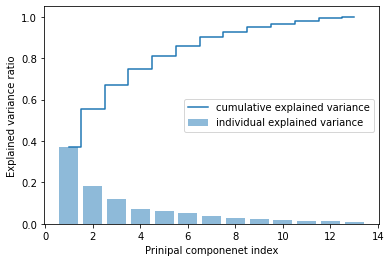

In [5]:
# Sorting the eigen values

denominator = sum(eigen_vals)

var_exp = [(i/denominator) for i in sorted(eigen_vals, reverse = True)]

cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt

plt.bar(range(1,14), var_exp, alpha = 0.5, align = 'center', label = 'individual explained variance')
plt.step(range(1,14), cum_var_exp, where = 'mid', label = 'cumulative explained variance')

plt.xlabel('Prinipal componenet index')
plt.ylabel('Explained variance ratio')
plt.legend(loc = 'best')
plt.show()

## Feature Transformation 

Let's proceed with the last three steps to transform the dataset onto the new principal component axes. 

5. Select 'k' eigenvectors, which correspond to the k largest eigenvalues, where k $\le$ d.
6. Construct a projection matrix W from the 'top' k eigenvectors.
7. Transform the d-dimensional input dataset X using the projection matrix W to obtain the new k-dimensional feature subspace.

#### Step 5: Select 'k' eigenvectors, which correspond to the k largest eigenvalues, where k $\le$ d.

In [6]:
# Make a list of (eigenvalue, eigenvector) tuples

eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low 

eigen_pairs.sort(key = lambda k: k[0], reverse = True)

#### Step 6: 